In [1]:
!pip install weibull

https://weibull.readthedocs.io/en/latest/examples.html

# Examples

## Determining 𝛽 and 𝜂 Values

Before any suppositions may be gathered, it is appropriate to calculate 𝛽 and 𝜂 values. Once we are satisfied that 𝛽 and 𝜂 match the raw data, we can move on to determining useful life characteristics for the product.

### Example 1: Complete Test Data

In this example, we will take a complete set of failure data that has no censorship and apply basic weibull analysis tool suite in order to achieve a simple, accurate, and useful analysis.:

In [2]:
import weibull

# fail times include no censored data
fail_times = [
    9402.7,
    6082.4,
    13367.2,
    10644.6,
    8632.0,
    3043.4,
    12860.2,
    1034.5,
    2550.9,
    3637.1
]

# this is where the actual analysis and curve fitting occur
analysis = weibull.Analysis(fail_times, unit='hour')
analysis.fit(method='mle')

/anaconda3/lib/python3.7/site-packages/weibull/__init__.py:9: UserWarning: The "weibull" module is being superceded by the "reliability" module and will no longer be maintained. Please refactor your code for this alternative model and thank you for using weibull!
  warnings.warn('The "weibull" module is being superceded by the "reliability" module and will no longer be maintained. '
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3099: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


<Figure size 1200x800 with 1 Axes>

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


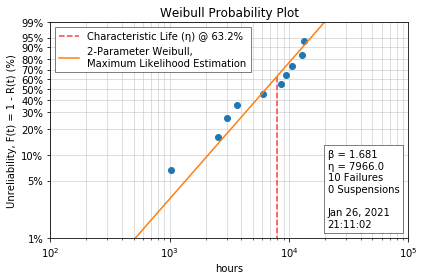

In [3]:
analysis.probplot()

In this example, we chose to use the Maximum Likelihood Estimation method of estimating 𝛽 and 𝜂, which is shown in the `analysis.fit(method='mle)` line. If the `fit()` method were called with no parameters, it would - by default - have used linear regression.

By examining the probability plot, we can visually determine if the 𝛽 and 𝜂 are appropriately calculated.

By specifying a file name, the probability plot can be saved to a file `analysis.probplot(file_name='prob.png')`. This is optional, of course, and not required.

### Example 2: Right-Censored Data

Often, it is necessary to use only the smallest amount of data in order to calculate the values for 𝛽 and 𝜂. For instance, a long-running test might have 10 units on the test bench, but only 3 of them have failed. When the data is so small, the default linear regression fit method is probably going to yield better results than the maximum-likelihood estimation:

In [4]:
current_run_time = 4200.0

fail_times = [current_run_time] * 10
fail_times[7] = 1034.5
fail_times[8] = 2550.9
fail_times[6] = 3043.4

suspended = [True, True, True, True, True,
             False, False, False, True, True]

analysis = weibull.Analysis(fail_times,
                            suspended=suspended,
                            unit='hour')
analysis.fit()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3099: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


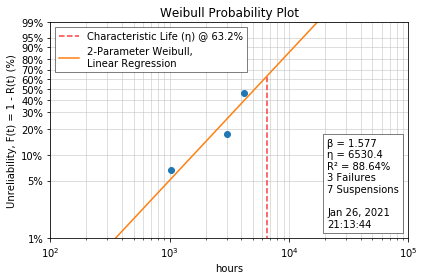

In [5]:
analysis.probplot()

Again, we plot the raw data points against the calculated 𝛽 and 𝜂 in order to ensure that the linear regression is an appropriate fit for the data. As more failures occur, more accurate curve fits may be run.

## Life Calculations

Once 𝛽 and 𝜂 are determined, then they may be utilized to obtain the basic lifetime data that may be utilized for planning. One common reliability metric is the B-Life:

https://weibull.readthedocs.io/en/latest/briefintro.html#b-life

Obtaining a B10 life using the `analysis` object is trivial:

In [6]:
print(f'B10 life: {analysis.b(10):.0f}')

B10 life: 1567


As you can see, simply calling the `b()` function with the appropriate number as the parameter will return the B-life based on 𝛽 and 𝜂.

## Basic Life Statistics

For user convenience, the `mean`, `median`, `characteristic_life`, and `mttf` are defined as attributes of the class and may be called at any time after an initial curve fit. Note that there is some overlap with other class variables. For instance, the `characteristic_life` happens to be the same thing as eta, but if a customer asks for the characteristic life, then having this available makes the code more readable and correspond more closely to the specification.

## Plotting

We can also plot various functions of interest, such as the survival function and hazard functions, amongst others:

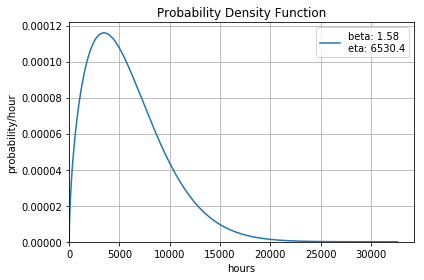

In [7]:
analysis.pdf()      # probability density function

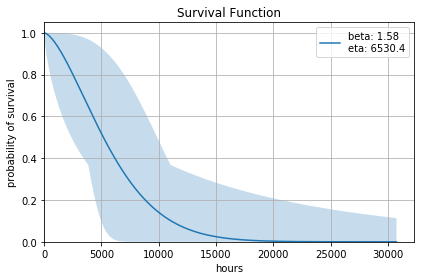

In [8]:
analysis.sf()       # survival function

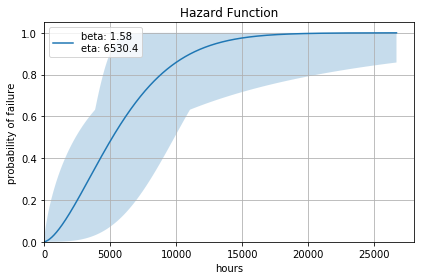

In [9]:
analysis.hazard()   # hazard function

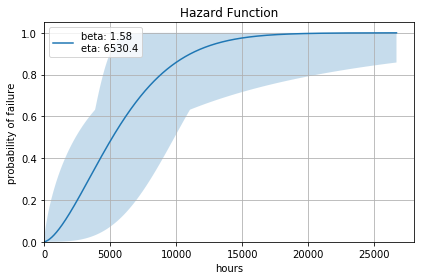

In [10]:
analysis.cdf()      # cumulative distribution function

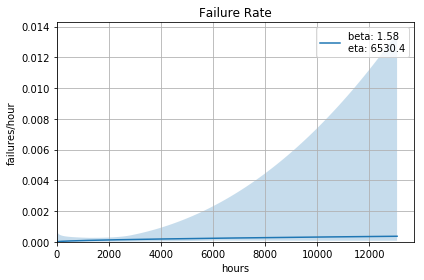

In [11]:
analysis.fr()       # failure rate

Each of these will generate a plot of the function. For all plotting methods, if `file_name` is specified as a parameter, then the method will save to a file rather than display. For instance:

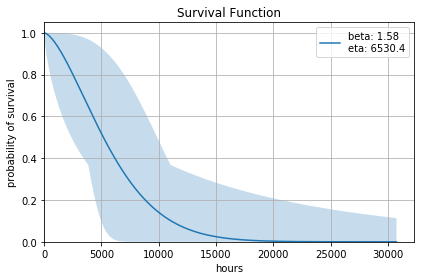

In [12]:
analysis.sf(file_name='survival_function.png')

## Test Design

The Design class is to be utilized for two scenarios:

- determine the required number of units to prove the target reliability given a test cycles/duration

- determine the required number of cycles/duration to prove the target reliability given a number of units

To begin, first import and instantiate the Designer, which is the utility for the test designer. There are several parameters to consider and all of them are requirements or assumptions that must be entered as parameters for the Designer class:

- target_cycles - the target to be proven in hours/days/weeks/cycles

- reliability - defaults to 0.9

- confidence_level - defaults to 0.95

- expected_beta - an initial assumption for beta (defaults to 2)

Shown are two example calculations for a target lifetime of 10000 hours with a reliability of 0.9 at a confidence level of 0.5 and beta assumption of 1.5:

In [14]:
import weibull

designer = weibull.Design(
    target_cycles=10000,
    reliability=0.9,
    confidence_level=0.90,
    expected_beta=1.5
)

print(designer)

In [16]:
# The 'test_cycles' parameter can be in any units.
# Days, weeks, hours, cycles, etc., so long as the target unit is consistent
print(f'Minimum number of units for 10000 hour run: {designer.num_of_units(test_cycles=10000)}')

Minimum number of units for 10000 hour run: 21.854345326782834


In [17]:
print(f'Minimum hours for 20 units: {designer.num_of_cycles(num_of_units=20)}')

TypeError: num_of_cycles() got an unexpected keyword argument 'num_of_units'

## Weibayes Analysis

Use Weibayes analysis to assist with designing your test or evaluating reliability within a certain confidence interval based on historical data.

You have a product that needs to be tested to B2 life of 40 million time units with a confidence limit of 95%. The product had an expected beta of 2 (lots of historical data there). B2 life is the same as 98% survival.

Using the weibull test Design class, we need to run 62 units (the limit of our test rig) for 62 million time units with no failures:

In [18]:
import weibull

designer = weibull.Design(
    target_cycles=40e6,
    reliability=0.98,
    confidence_level=0.95,
    expected_beta=2
)

In [19]:
print(f'Minimum hours for 62 units: {designer.num_of_cycles(num_of_units=62)}')

TypeError: num_of_cycles() got an unexpected keyword argument 'num_of_units'

Weibayes analysis on the data would arrive at the same result:

In [20]:
import weibull

# we want N units to run for H hours each
N = 62
H = 62.0e6

run_times_desired = [H] * N
weibayes = weibull.Weibayes(run_times_desired, confidence_level=0.95, beta=2)

In [21]:
print(f'B2 life: {weibayes.b(2)}')

B2 life: 40090439.86038491


Note that this B2 matches very closely with target_cycles value found in the above iteration of the Design class.

We can further plot the data using `weibayes.plot()` resulting in:

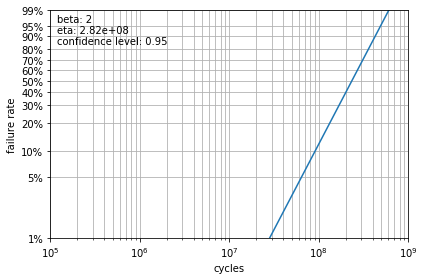

In [22]:
weibayes.plot()

https://github.com/slightlynybbled/weibull